In [2]:
sql_path = "order-management.sqlite"

In [3]:
import pm4py

ocel = pm4py.read_ocel2_sqlite(sql_path)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pm4py/objects/ocel/importer/sqlite/variants/ocel20.py:70: UserWarning: There are unsatisfied OCEL 2.0 constraints in the given relational database: ['const_14_primary_key_object_event_map_type_tables', 'const_15_primary_key_object_event_tables', 'const_16_primary_key_event_object_table', 'const_17_primary_key_object_object_table', 'const_18_primary_key_event_type_spec_tables', 'const_19_foreign_key_event', 'const_20_foreign_key_object', 'const_21_foreign_key_event_object', 'const_22_foreign_key_object_object', 'const_23_foreign_key_event_type_specific', 'const_24_foreign_key_object_type_specific']
  warnings.warn("There are unsatisfied OCEL 2.0 constraints in the given relational database: "+str(unsatisfied))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pm4py/objects/log/util/dataframe_utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

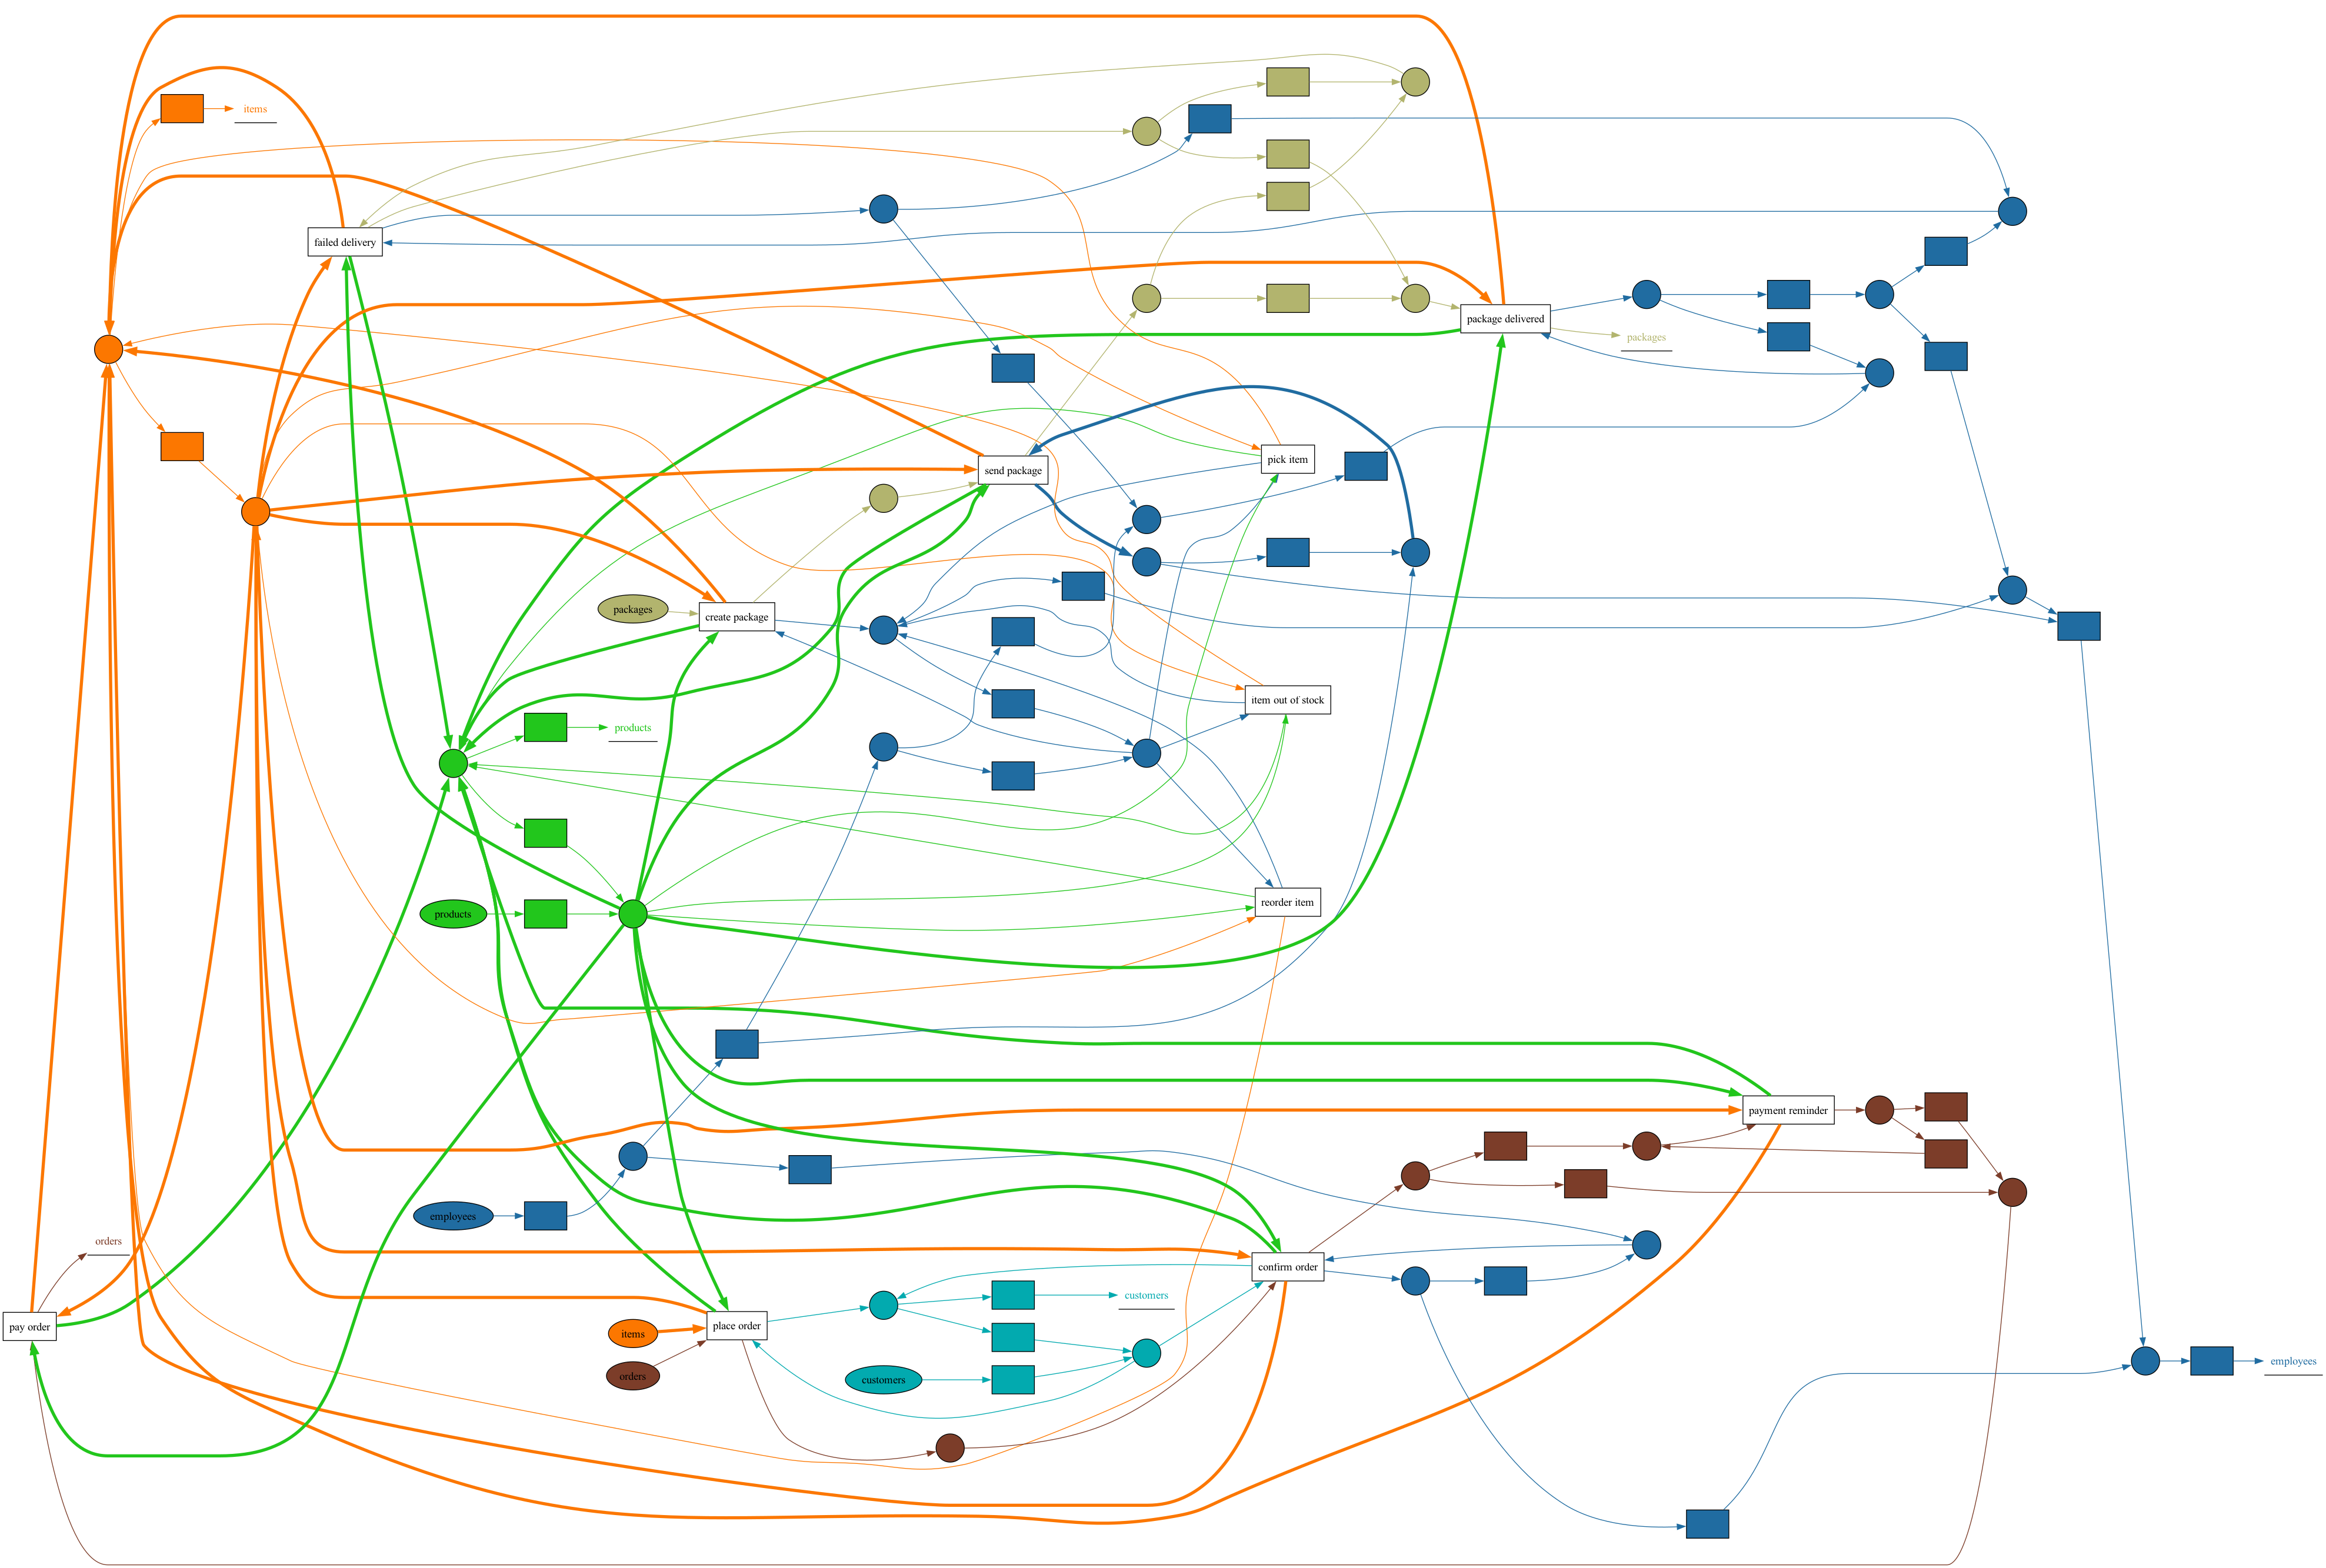

In [8]:
ocpn = pm4py.discover_oc_petri_net(ocel)
pm4py.view_ocpn(ocpn)

In [7]:
pm4py.ocel.ocel_get_object_types(ocel)

['customers', 'employees', 'items', 'orders', 'packages', 'products']

In [6]:
pm4py.ocel.ocel_get_attribute_names(ocel)

['price', 'role', 'weight']

In [11]:
for i,j in pm4py.ocel.ocel_object_type_activities(ocel).items():
    print(i)
    print(j)
    print("*-"*15)
    "\n"

customers
{'place order', 'confirm order'}
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
employees
{'send package', 'package delivered', 'create package', 'item out of stock', 'reorder item', 'confirm order', 'failed delivery', 'pick item'}
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
items
{'pay order', 'send package', 'package delivered', 'create package', 'item out of stock', 'payment reminder', 'reorder item', 'confirm order', 'failed delivery', 'pick item', 'place order'}
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
orders
{'pay order', 'place order', 'payment reminder', 'confirm order'}
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
products
{'pay order', 'send package', 'package delivered', 'create package', 'item out of stock', 'payment reminder', 'reorder item', 'confirm order', 'failed delivery', 'pick item', 'place order'}
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
packages
{'create package', 'failed delivery', 'send package', 'package delivered'}
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


In [15]:
pm4py.ocel.ocel_temporal_summary(ocel).head()

,ocel:timestamp,ocel:activity,ocel:oid
0,2023-04-03 12:08:18+00:00,"[place order, place order, place order, place ...","[AlpenTech Innovations AG, Echo, i-880001, i-8..."
1,2023-04-03 13:21:49+00:00,"[pick item, pick item, pick item]","[Leah Tacke genannt Unterberg, i-880003, iPhon..."
2,2023-04-03 16:36:55+00:00,"[place order, place order, place order, place ...","[AlpenTech Innovations AG, Kindle Paperwhite, ..."
3,2023-04-03 23:31:23+00:00,"[place order, place order, place order, place ...","[Celtica Green Farms Oy, Fire Stick, Kindle Pa..."
4,2023-04-04 09:50:21+00:00,"[pick item, pick item, pick item]","[Echo, Leah Tacke genannt Unterberg, i-880001]"


In [16]:
pm4py.ocel.ocel_temporal_summary(ocel).head()["ocel:activity"][0]

['place order',
 'place order',
 'place order',
 'place order',
 'place order',
 'place order',
 'place order']

In [17]:
pm4py.ocel.ocel_temporal_summary(ocel).head()["ocel:oid"][0]

['AlpenTech Innovations AG',
 'Echo',
 'i-880001',
 'i-880002',
 'i-880003',
 'iPhone 11 Pro',
 'o-990001']

In [19]:
pm4py.ocel.ocel_objects_summary(ocel).head()

,ocel:oid,activities_lifecycle,lifecycle_start,lifecycle_end,lifecycle_duration,interacting_objects
0,Alessandro Berti,"[send package, package delivered, send package...",2023-04-13 12:50:06+00:00,2024-05-15 08:44:11+00:00,34372445.0,"{i-886215, i-882949, i-884559, p-660581, i-883..."
1,AlpenTech Innovations AG,"[place order, place order, confirm order, conf...",2023-04-03 12:08:18+00:00,2024-03-20 12:14:15+00:00,30413157.0,"{i-880552, i-884778, i-887501, i-881337, i-880..."
2,Balkan Minerals d.o.o.,"[place order, confirm order, place order, conf...",2023-04-05 06:24:56+00:00,2024-03-20 16:42:13+00:00,30277037.0,"{i-883252, i-887329, i-884197, i-883010, i-883..."
3,Baltic Wave Energies Ltd.,"[place order, confirm order, place order, conf...",2023-04-04 12:30:50+00:00,2024-03-20 14:00:35+00:00,30331785.0,"{i-883411, o-990259, i-881271, i-883737, i-884..."
4,Benedikt Knopp,"[pick item, item out of stock, pick item, pick...",2023-04-04 15:08:41+00:00,2024-05-12 01:00:00+00:00,34854679.0,"{i-886439, i-883252, i-885048, i-887148, i-884..."


In [20]:
pm4py.ocel.ocel_objects_interactions_summary(ocel)

,ocel:eid,ocel:activity,ocel:oid,ocel:type,ocel:oid_2,ocel:type_2
0,confirm_o-990001,confirm order,AlpenTech Innovations AG,customers,Echo,products
1,confirm_o-990001,confirm order,AlpenTech Innovations AG,customers,Wil van der Aalst,employees
2,confirm_o-990001,confirm order,AlpenTech Innovations AG,customers,i-880001,items
3,confirm_o-990001,confirm order,AlpenTech Innovations AG,customers,i-880002,items
4,confirm_o-990001,confirm order,AlpenTech Innovations AG,customers,i-880003,items
...,...,...,...,...,...,...
1526491,send_p-661128,send package,i-887573,items,p-661128,packages
1526492,send_p-661128,send package,p-661128,packages,Echo Dot,products
1526493,send_p-661128,send package,p-661128,packages,Viki Peeva,employees
1526494,send_p-661128,send package,p-661128,packages,Viki Peeva,employees
